In [58]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [59]:
class BatsmanState(TypedDict):

    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percent:float
    summary:str

In [60]:
def calculate_sr(state:BatsmanState)->BatsmanState:
    runs=state['runs']
    balls=state['balls']
    sr=(runs/balls)*100
    state['sr']=sr
    return {'sr':sr}

In [61]:
def calculate_bpb(state:BatsmanState)->BatsmanState:
    balls=state['balls']
    fours=state['fours']
    sixes=state['sixes']
    bpb=(balls/(fours+sixes))
    state['bpb']=bpb
    return {'bpb':bpb}

In [62]:
def boundary_percent(state:BatsmanState)->BatsmanState:
    sixes=state['sixes']
    fours=state['fours']
    runs=state['runs']
    bp=(((fours*4)+(sixes*6))/(runs))*100
    state['bp']=bp
    return {'boundary_percent':bp}

In [63]:
def summary(state:BatsmanState)->BatsmanState:
    summary=f"""

Strike Rate : {state['sr']}\n
Boundary Percentage: {state['boundary_percent']}\n
Balls Per Boundary :{state['bpb']}/n

"""
    state['summary']=summary
    return {'summary':summary}
    

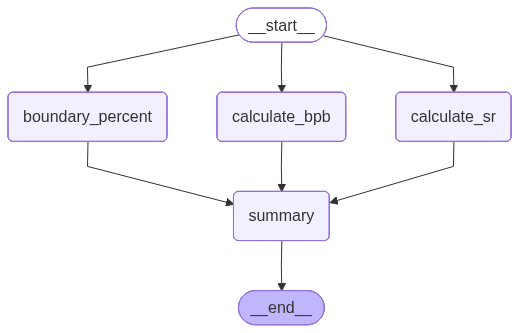

In [64]:
# make the graph
graph=StateGraph(BatsmanState)

# add the nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('boundary_percent',boundary_percent)
graph.add_node('summary',summary)

# add the edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'boundary_percent')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('boundary_percent','summary')

graph.add_edge('summary',END)


# compile the graph
workflow=graph.compile()
workflow

In [65]:
# execute the graph
initial_state={
    'runs':100,
    'balls':21,
    'fours':4,
    'sixes':4
}

final_state=workflow.invoke(initial_state)
final_state

{'runs': 100,
 'balls': 21,
 'fours': 4,
 'sixes': 4,
 'sr': 476.1904761904762,
 'bpb': 2.625,
 'boundary_percent': 40.0,
 'summary': '\n\nStrike Rate : 476.1904761904762\n\nBoundary Percentage: 40.0\n\nBalls Per Boundary :2.625/n\n\n'}